In [2]:
from qutip import *
import numpy as np
np.set_printoptions(linewidth=230,suppress=True,precision=3)


import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import HTML 
HTML("<style>.container { width:98% !important; }</style>")

# How to use mesolve to simulate loss in fiber (single mode)
We are going to use QuTiP's function `mesolve` to simulate loss in fiber. This function is essentially the solver for master equations in the form $\dot \rho(t) = \frac{-i}{\hbar}[H,\rho]+\sum_i\gamma_i\mathcal{D}[L_i]\rho$, with the usual definition of the dissipator with Lindblad operators $L_i$.

Now, for loss in a single mode fiber the master equation is $\dot\rho = \gamma\mathcal{D}[\hat a]\rho$, where the rate of loss $\gamma$ will be 0.2 dB/Km. There is only one jump operator here ($\hat a$), so we set up the function as follows:

In [17]:
H = 0.5*(identity(20)+num(20))

def cat_L(N, alpha, mu):
    l = Qobj()
    l = (
        coherent(N,alpha) + coherent(N, -alpha) 
        + ((-1)**mu)*(coherent(N,1J*alpha)+coherent(N,-1J*alpha))
    )/(4*np.sqrt(2*(np.cosh(alpha**2) + ((-1)**mu)*np.cos(alpha**2))))
    return l.unit()

c0 = cat_L(20, 2, 0)
c1 = cat_L(20, 2, 1)

distance = np.arange(0,50,.5)
sqrt_gamma = np.sqrt(0.3)

states0 = mesolve(H, c0, distance, [sqrt_gamma*destroy(20)])
states1 = mesolve(H, c1, distance, [sqrt_gamma*destroy(20)])

In [18]:
overlap = [np.real((s.dag()*t).tr()) for s,t in zip(states0.states,states1.states)] #real() is just to discard 0j
trace_dist = [tracedist(s,t) for s,t in zip(states0.states,states1.states)]

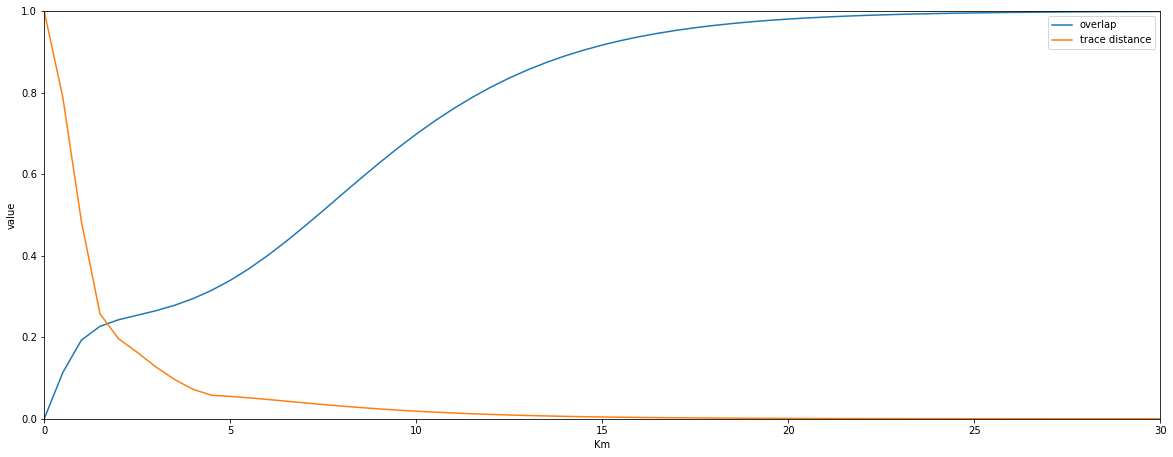

In [21]:
fig, ax = plt.subplots()

ax.plot(distance, overlap)
ax.plot(distance, trace_dist)

ax.set_xlabel('Km');
ax.set_ylabel('value');
ax.legend(["overlap","trace distance"], loc=1);

ax.set_ylim([0.0,1])
ax.set_xlim([0.0,30])

plt.rcParams['figure.figsize']=[20,7.5]
plt.show()